# <b>1. Introduction: What is Churn?</b>
### <b><u>Meaningful Point</u></b>: 
### In simple terms, churn is when a customer stops doing business with a company. They cancel their subscription, close their account, or simply stop using the service and switch to a competitor (or stop using the service altogether).

### <b><u>Example</u></b> : In this dataset, "churn" almost certainly refers to customers who have discontinued their service with the telecom company.

## <u><b>Our Goal</b></u> : 
### To use this Telco-Customer-Prediction Dataset to predict the customer churn by applying several powerfull Machine Learning Models

# <b>2. Importing useful libraries & ml models</b>

In [164]:
# ----------Data Handling----------
import numpy as np
import pandas as pd
import missingno as msno

# ----------Data Visualization----------
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from IPython.display import display, Markdown
from tabulate import tabulate

# -----------Utilities------------
import warnings
warnings.filterwarnings("ignore")
from IPython.display import display, Markdown
import joblib

# -----------ML Models-----------
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix



## <b>#Loading the data</b>

In [165]:
df = pd.read_csv('customer-churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## <b>Data Info</b>

In [166]:
print('-----------Dataset Info-----------')
df.info()

-----------Dataset Info-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Paperle

## <b>Dataset Description</b>

In [167]:
print('--------------Data Description---------------')
df.describe()

--------------Data Description---------------


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [168]:
print('---------------Unique values in Categorical Columns----------------')
for col in df.select_dtypes(include = 'object').columns:
  print(f'{col}:{df[col].unique()}')

---------------Unique values in Categorical Columns----------------
customerID:['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges:['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn:['No' 'Yes']


# <b>3. Initial Data Cleaning Part</b>

In [169]:
# ----------Converting the TotalCharges from object to numeric datatype-------------
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')

<Axes: >

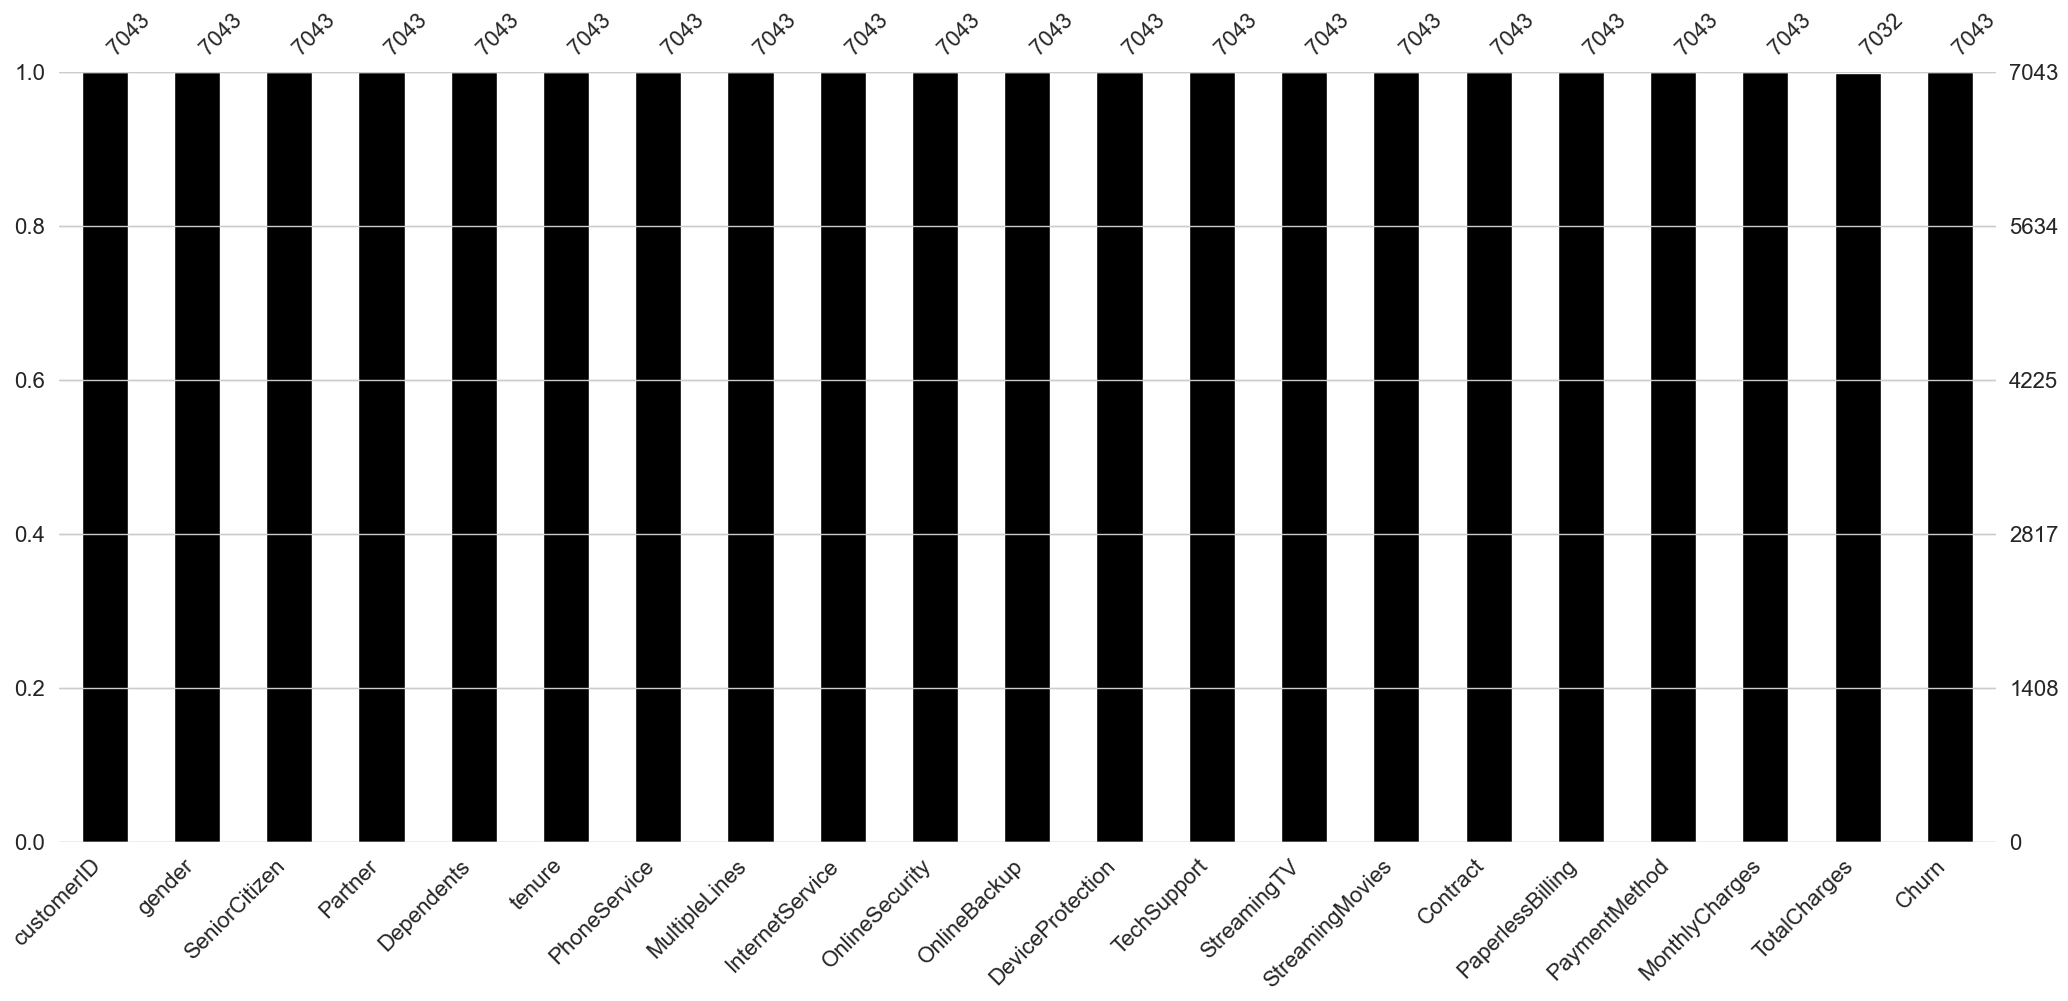

In [170]:
msno.bar(df,color = 'black')

In [171]:
print("-----------Check for null value in TotalCharges------------")
print(f"Null Values after Transformation: {df['TotalCharges'].isnull().sum()}")

# ---------------Fill with median values in TotalCharges----------------
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

print('\n----------After filling the NaN values------------')
print(f"Null Values in TotalCharges: {df['TotalCharges'].isnull().sum()}")

-----------Check for null value in TotalCharges------------
Null Values after Transformation: 11

----------After filling the NaN values------------
Null Values in TotalCharges: 0


In [172]:
print("---------Dropping the customerID column-----------")
print("=> As we have already the index values so no need of customerID column")
df = df.drop(columns = 'customerID')

---------Dropping the customerID column-----------
=> As we have already the index values so no need of customerID column


Converting the `SeniorCititzen` values from `0` & `1` to `Yes` & `No` to maintain the consistency

In [173]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({0:"No",1:"Yes"})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# <b>4. Data Visualization</b>

### Churn -> Indicates whether the customer canceled their contract in the last month.
### Services -> Columns describing which services the customer is subscribed to.
### Contract Type -> Includes information about contract renewal, payment method, tenure, monthly charges, and total charges.
### Customer Information -> Gender, age, partner, and dependents.

## <b>1.Churn Distribution</b>

In [174]:
# Compute churn counts
churn_counts = df['Churn'].value_counts().reset_index()
churn_counts.columns = ['Churn', 'Count']
churn_counts['Percent'] = (churn_counts['Count'] / churn_counts['Count'].sum()) * 100

# Create Plotly bar chart
fig = px.bar(
    churn_counts,
    x='Churn',
    y='Count',
    text=churn_counts['Percent'].apply(lambda x: f"{x:.1f}%"),
    color='Churn',
    color_discrete_map={'Yes': '#E76F51',  
             'No':  '#2A9D8F'},
    title="<b>Distribution of Customer Churn</b>"
)

fig.update_traces(textposition='outside')
fig.update_layout(
    width=650,
    height=500,
    title_x=0.5,
    xaxis_title='<b>Churn</b>',
    yaxis_title='<b>Count of Customers</b>',
    showlegend=False,
    bargap=0.4,
    plot_bgcolor='white',
    font=dict(size=13)
)

fig.show()
churn_rate = (df['Churn'] == 'Yes').mean() * 100
print(f"\nChurn Rate: {churn_rate:.2f}%")



Churn Rate: 26.54%


### **Insights from Customer Churn Distribution**

- Around **26.5%** of customers have churned, while **73.5%** have remained, indicating a **class imbalance** in the dataset.  
- The imbalance suggests that the model should focus on **recall** to effectively capture the minority churn class.  
- A significant proportion of non-churning customers highlights the need for **balanced sampling or weighting techniques** during model training.  
- This distribution emphasizes that even a small churn percentage can represent **substantial business revenue loss**, making accurate churn prediction critical.


## <b>2. Churned Customers with Gender Distribution</b>

In [184]:
# -------Gender Count & Churn Count-------
gender_counts = df['gender'].value_counts()
churn_counts = df['Churn'].value_counts()


In [185]:
labels1 = list(gender_counts.index)
values1 = list(gender_counts.values)

labels2 = list(churn_counts.index)
values2 = list(churn_counts.values)

specs = [[{'type':'domain'},{'type':'domain'}]]
fig = make_subplots(rows = 1,cols =2,specs = specs, subplot_titles = ['Gender','Churned Customers'])

fig.add_trace(go.Pie(
  labels = labels1,
  values = values1,
  marker_colors =["#5196F7", "#F3ABEC"],
  hole = 0.4, # create a hole in between
  textinfo = 'percent + label', # it means show label and % on the plot
  insidetextorientation="radial", # it means to keep the text in plot according to radial shape
  textposition = 'inside',
  textfont = dict(size = 18),
  showlegend = True
),row = 1,col = 1)

fig.add_trace(go.Pie(
  labels = labels2,
  values = values2,
  marker_colors =["#6DF83A", "#1EE4F2"],
  hole = 0.4, # create a hole in between
  textinfo = 'percent + label', # it means show label and % on the plot
  insidetextorientation="radial", # it means to keep the text in plot according to radial shape
  textposition = 'inside',
  textfont = dict(size = 16),
  showlegend = True
),row = 1,col = 2)

fig.update_layout(title_text = '<b>Churned Customers</b>',
                  title_x = 0.5
                  )
fig.show()

### **Insights from Gender and Churn Distribution**

- The **gender distribution** is almost equal — **50.5% male** and **49.5% female**, showing that both genders are equally represented in the customer base.  
- The **overall churn rate** is approximately **26.5%**, meaning about one-fourth of the customers have discontinued the service.  
- When analyzing churn by gender, **both male and female customers show nearly equal churn proportions**, indicating that **gender is not a strong predictor** of churn risk in this dataset.  


## <b>3.Contract Types By Churn</b>

In [14]:
fig = px.histogram(
  df, x = 'Churn', color = "Contract",barmode = 'group',histnorm = "percent",
  title = "<b>Distribution of Contract Types by Churn</b>"
)

fig.update_layout(
  width = 800, height = 550,
  title_x = 0.5, # move the title to center
  bargap = 0.20, # gap between th e bars
  xaxis_title = '<b>Churn</b>',
  yaxis_title = '<b>Percent %</b>',
  legend = dict(orientation = 'h',yanchor = 'bottom',xanchor = 'right',y = 1.02,x = 1), # adjusting the legend line by axis values

)
fig.update_traces(
    texttemplate='%{y:.1f}%',  # display the y-value as a percent
    textposition='outside'
)
fig.show()

### **Insights from Distribution of Contract Types by Churn**

- Customers with **month-to-month contracts** have the **highest churn rate (42.7%)**, suggesting they are more likely to leave the service compared to other contract types.  
- **One-year (11.3%)** and **two-year (2.8%)** contract customers show **significantly lower churn rates**, indicating that **long-term contracts promote customer retention**.  
- Among non-churned customers, **97.2% of two-year** and **88.7% of one-year** contract holders remained loyal, reinforcing that **longer commitments reduce churn probability**.  
- This pattern highlights the importance of **encouraging customers to move toward longer-term plans** through loyalty programs or discounts to enhance retention.  


In [15]:
# --------churn rate---------
churn_rate = df.groupby('Contract')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100).reset_index()
churn_rate.columns = ['Contract','Churn_rate']
churn_rate = churn_rate.sort_values('Churn_rate',ascending = True)
print(churn_rate)

         Contract  Churn_rate
2        Two year    2.831858
1        One year   11.269518
0  Month-to-month   42.709677


## <b>4.Churn Rate By Contract Type</b>

In [16]:
# -------plotting of churn rate---------
fig = px.bar(
  churn_rate,
  x = "Churn_rate",y = 'Contract',
  title = '<b>Churn Rate by Contract Type</b>',
  color = 'Churn_rate',
  text = 'Churn_rate'
)

fig.update_traces(texttemplate = '%{text:.1f}%',textposition='inside')
fig.update_layout(
  width = 800,height = 400,
  title_x = 0.5,
  xaxis_title = '<b>Churn Rate (%)</b>',
  yaxis_title = '<b>Contract Type</b>'
)
fig.show()

## <b>Key Insights on Churn Rate by Contract Type</b>

- **Month-to-month contracts** → Highest churn rate (**42.7%**).  
  Customers on flexible plans are more likely to leave due to low commitment.  

- **One-year contracts** → Moderate churn rate (**11.3%**).  
  Medium-term commitment helps retain customers better.  

- **Two-year contracts** → Lowest churn rate (**2.8%**).  
  Long-term agreements significantly reduce customer churn.  

###  <b>Overall Insight</b>:
### Encouraging customers to shift from month-to-month to longer-term contracts can greatly improve retention and reduce churn risk.


## <b>5.Payment Methods Pie Chart</b>

In [187]:
payment_methods = df['PaymentMethod'].value_counts()
labels = list(payment_methods.index)
values = list(payment_methods.values)
fig = go.Figure(data=[go.Pie(
    labels=labels, 
    values=values, 
    hole=0.4,
    textinfo="percent",
    textposition="inside",
    insidetextorientation="horizontal",
    textfont=dict(size=18),
    marker_colors=["#CCF780", "#08F7E7", "#2EFB2E", "#67D2A0"]
)])


fig.update_layout(title_text = '<b>Distribution Of Payment Methods</b>',title_x = 0.45)

fig.show()

## Insights on Distribution of Payment Methods

- **Electronic check (33.6%)** is the **most used payment method**, suggesting customers prefer quick, paperless transactions.  
- **Mailed check (21.6%)**, **Bank transfer (automatic) (21.9%)**, and **Credit card (automatic) (22.9%)** are nearly evenly used, showing diverse preferences for automatic and manual payments.  
- **Insight:** While electronic checks dominate, the close distribution among other methods indicates that offering **multiple payment options** remains essential to meet customer convenience needs.  
- **Actionable Focus:** Investigate if churn rates differ by payment type — customers using **manual methods** (like mailed checks) may have higher churn due to lower automation and engagement.


## <b>6.Churn with respect to Internet Service & Gender</b>

<Figure size 1200x800 with 0 Axes>

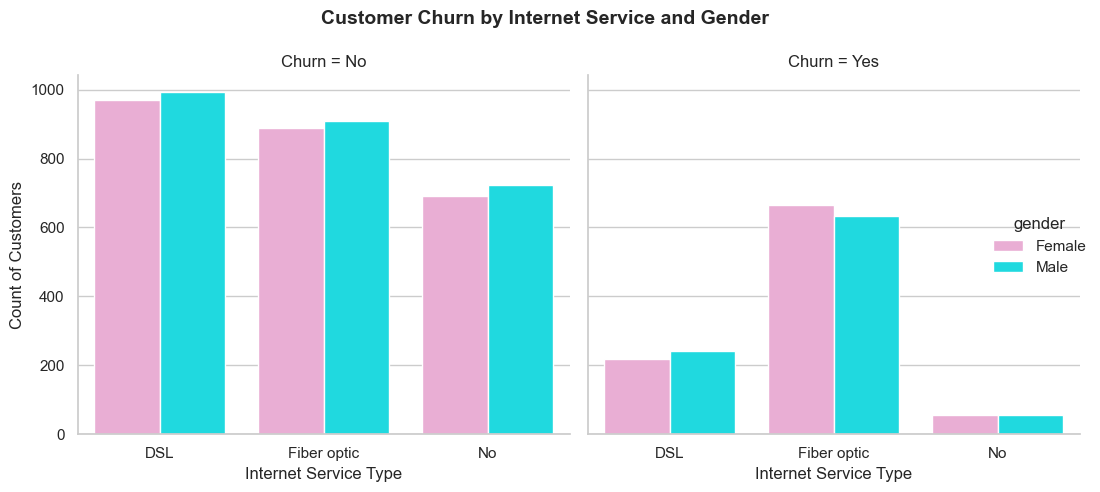

In [188]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (12,8))
g = sns.catplot(
    data=df,
    x="InternetService",
    hue="gender",
    col="Churn",        
    kind="count",
    palette={"Female": "#F3A4D7", "Male": "#00F7FF"}
)

g.fig.suptitle("Customer Churn by Internet Service and Gender", fontsize=14, fontweight="bold")
g.set_axis_labels("Internet Service Type", "Count of Customers")
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

## Insights on Customer Churn by Internet Service and Gender

- **DSL users** show **lower churn rates** for both genders, indicating better customer retention with DSL service.  
- **Fiber optic users** have a **significantly higher churn rate**, suggesting possible dissatisfaction with pricing, service quality, or competition.  
- **Customers without internet service** show **very low churn**, likely due to limited engagement with internet-related issues.  
- **Gender comparison:** Churn behavior is **almost identical** between males and females across all internet types — gender doesn’t appear to influence churn significantly.  

### Key Points:
The **type of internet service** is a stronger predictor of churn than gender.  
Focus on **retention efforts for fiber optic customers**, possibly through service quality improvements or better pricing models.


## <b>7. Dependent Types by Churn</b>

In [19]:
fig = px.histogram(
    df,
    x='Churn',
    color='Dependents',
    barmode='group',
    histnorm='percent',
    title='<b>Distribution of Dependents Types by Churn</b>',
    color_discrete_map={
        'Yes': '#E76F51',  # coral
        'No': '#2A9D8F'    # teal
    }
)
fig.update_layout(
  width = 800, height = 550,
  title_x = 0.5, # move the title to center
  bargap = 0.20, # gap between the bars
  xaxis_title = '<b>Churn</b>',
  yaxis_title = '<b>Percent %</b>',
  legend = dict(orientation = 'h',yanchor = 'bottom',xanchor = 'right',y = 1.02,x = 1), # adjusting the legend line by axis values

)
fig.update_traces(
  texttemplate='%{y:.1f}%',  # display the y-value as a percent
  textposition='outside',
  marker_line_color = 'white',
  marker_line_width = 1.0
)
fig.show()


## Insights on Churn by Dependent Status

- Customers **without dependents** have a **much higher churn rate (84.5%)**, showing they are more likely to leave the service.  
- Customers **with dependents** show a **lower churn rate (15.5%)**, indicating stronger loyalty or stability.  
- **Interpretation:** Having dependents may correlate with more consistent service needs, leading to reduced churn risk.  

### Key Points:
Target **customers without dependents** with retention strategies — such as personalized offers or loyalty programs — since they represent the **highest churn risk group**.


## <b>8. Phone Service by Churn</b>

In [20]:
fig = px.histogram(
  df, 
  x = 'Churn', 
  color = "PhoneService",
  barmode = 'group',
  histnorm = "percent",
  title = "<b>Distribution of Phone Service by Churn</b>",
  color_discrete_map={
    'Yes': '#264653',  # deep navy
    'No': '#E9C46A'    # golden beige
}
)
fig.update_layout(
  width = 800, height = 550,
  title_x = 0.5, # move the title to center
  bargap = 0.20, # gap between the bars
  xaxis_title = '<b>Churn</b>',
  yaxis_title = '<b>Percent %</b>',
  legend = dict(orientation = 'h',yanchor = 'bottom',xanchor = 'right',y = 1.02,x = 1), # adjusting the legend line by axis values

)
fig.update_traces(
  texttemplate='%{y:.1f}%',  # display the y-value as a percent
  textposition='outside',
  marker_line_color = 'white',
  marker_line_width = 1.0
)
fig.show()

## Insights: Distribution of Phone Service by Churn

- **Customers with phone service** (Yes – 26.7%) have a **slightly higher churn rate** than those without (No – 24.9%).  
- The difference is minimal, suggesting that **phone service availability alone** doesn’t strongly influence churn.  
- **Interpretation:** Churn might depend more on other service factors (e.g., internet type, billing, or support) rather than the presence of phone service.

### Key Takeaway:
Phone service is **not a major driver of churn** — other service experiences likely have greater influence.


## <b>9. Partner Type by Churn</b>

In [21]:
fig = px.histogram(
  df, 
  x = 'Churn', 
  color = "Partner",
  barmode = 'group',
  histnorm = "percent",
  title = "<b>Distribution of Partner Type by Churn</b>",
  color_discrete_map = {
    'Yes': '#00B5AD',  # vivid cyan
    'No':  '#FF6B6B'   # coral red
  },
  text_auto = ".2f",
 
)
fig.update_layout(
  width = 800, height = 550,
  title_x = 0.5, # move the title to center
  bargap = 0.20, # gap between the bars
  xaxis_title = '<b>Churn</b>',
  yaxis_title = '<b>Percent %</b>',
  legend = dict(orientation = 'h',yanchor = 'bottom',xanchor = 'right',y = 1.02,x = 1), # adjusting the legend line by axis values

)
fig.update_traces(
  texttemplate='%{y:.1f}%',  # display the y-value as a percent
  textposition='outside',
  marker_line_color = 'white',
  marker_line_width = 1.0
)
fig.show()

## Insights: Distribution of Partner Type by Churn

- Customers **with partners** have a **lower churn rate (19.7%)** compared to those **without partners (33.0%)**.  
- This indicates that customers with partners are **more stable and less likely to leave**.  
- **Interpretation:** Having a partner could correlate with higher financial or lifestyle stability, reducing the likelihood of switching providers.

### Key Takeaway:
Focus retention strategies on **customers without partners**, as they represent a **higher churn risk group**.


## <b>10. Senior Citizens who Churned or Not?<b/>

In [22]:
fig = px.histogram(
  df, 
  x = 'Churn', 
  color = "SeniorCitizen",
  barmode = 'group',
  histnorm = "percent",
  title = "<b>Distribution of Senior Citizens by Churn</b>",
  color_discrete_map = {
    'Yes': "#605454",  # vivid cyan
    'No':  "#86B6C4"   # coral red
  },
  text_auto = ".2f",
 
)
fig.update_layout(
  width = 800, height = 550,
  title_x = 0.5, # move the title to center
  bargap = 0.20, # gap between the bars
  xaxis_title = '<b>Churn</b>',
  yaxis_title = '<b>Percent %</b>',
  legend = dict(orientation = 'h',yanchor = 'bottom',xanchor = 'right',y = 1.02,x = 1), # adjusting the legend line by axis values

)
fig.update_traces(
  texttemplate='%{y:.1f}%',  # display the y-value as a percent
  textposition='outside',
  marker_line_color = 'white',
  marker_line_width = 1.0
)
fig.show()

## Insights: Distribution of Senior Citizens by Churn

- **Senior citizens** show a **much higher churn rate (41.7%)** compared to **non-seniors (23.6%)**.  
- This suggests that **senior customers are more likely to leave**, possibly due to affordability concerns or service complexity.  
- **Interpretation:** Older customers may prefer simpler plans, better support, or lower-cost options.

### Key Takeaway:
Design **senior-friendly plans** and offer **personalized assistance** to improve retention among senior citizens.


## <b>11. Online Security Distribution for Churn prediction</b>

In [23]:
fig = px.histogram(
  df, x = 'Churn', color = "OnlineSecurity",barmode = 'group',histnorm = "percent",
  title = "<b>Distribution of OnlineSecurity by Churn</b>"
)

fig.update_layout(
  width = 800, height = 550,
  title_x = 0.5, 
  bargap = 0.20,
  xaxis_title = '<b>Churn</b>',
  yaxis_title = '<b>Percent %</b>',
  legend = dict(orientation = 'h',yanchor = 'bottom',xanchor = 'right',y = 1.02,x = 1), # adjusting the legend line by axis values

)
fig.update_traces(
    texttemplate='%{y:.1f}%',
    textposition='outside'
)
fig.show()

## Insights: Distribution of Online Security by Churn

- Customers **without online security** have the **highest churn rate (41.8%)**, showing they are more likely to leave the service.  
- Customers **with online security** show a **much lower churn rate (14.6%)**, suggesting that added protection and perceived value **improve retention**.  
- Customers **without internet service** have the **lowest churn (7.4%)**, likely because they are less engaged in online-related features.  
- **Interpretation:** Online security services appear to create a sense of safety and reliability, which **reduces churn** significantly.

### Key Takeaway:
Encourage customers to **adopt online security services** — this feature is strongly associated with **higher customer retention** and satisfaction.


## <b>2. Multiple Lines according to Churn Status</b>

In [24]:
fig = px.histogram(
  df, x = 'Churn', color = "MultipleLines",barmode = 'group',histnorm = "percent",
  title = "<b>Distribution of MultipleLines by Churn</b>"
)

fig.update_layout(
  width = 800, height = 550,
  title_x = 0.5, 
  bargap = 0.20,
  xaxis_title = '<b>Churn</b>',
  yaxis_title = '<b>Percent %</b>',
  legend = dict(orientation = 'h',yanchor = 'bottom',xanchor = 'right',y = 1.02,x = 1), # adjusting the legend line by axis values

)
fig.update_traces(
    texttemplate='%{y:.1f}%',
    textposition='outside'
)
fig.show()

## Insights: Distribution of Multiple Lines by Churn

- Customers with **multiple lines** have a **slightly higher churn rate (28.6%)** than those with a **single line or no phone service (~25%)**.  
- The difference is small but suggests that managing multiple lines could be **linked to higher service expectations**.  
- **Interpretation:** Customers with multiple lines may churn if they find better bundled deals or face billing complexity.

### Key Takeaway:
Enhance **multi-line plans** with **discounts or family bundles** to retain this segment and reduce churn.


## <b>13.KDE Plot Of Monthly Charges by Churn</b>

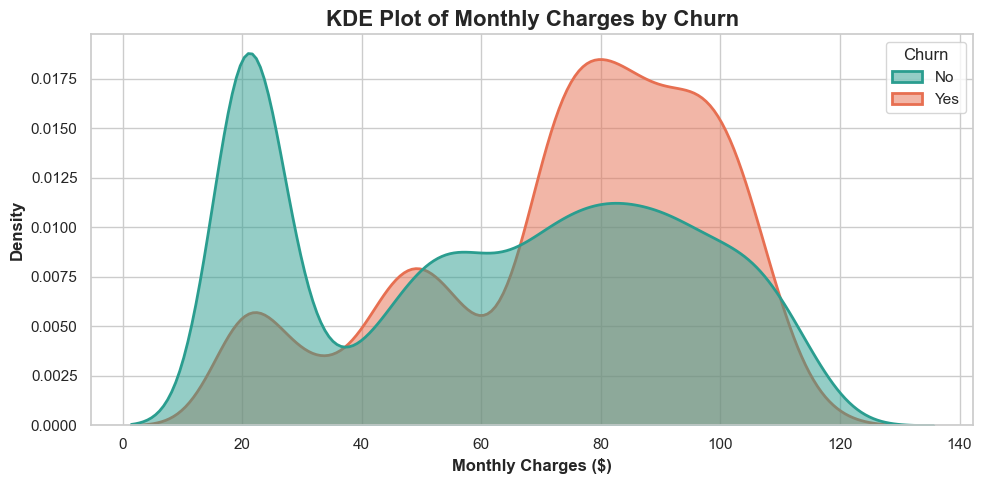

In [25]:
plt.figure(figsize=(10, 5))
sns.kdeplot(
    data=df,
    x='MonthlyCharges',
    hue='Churn',
    fill=True,                 
    common_norm=False,          
    palette={'Yes': '#E76F51', 'No': '#2A9D8F'},
    alpha=0.5,                 
    linewidth=2
)

plt.title('KDE Plot of Monthly Charges by Churn', fontsize=16, fontweight='bold')
plt.xlabel('Monthly Charges ($)', fontsize=12, fontweight='bold')
plt.ylabel('Density', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()


## Insights: Monthly Charges by Churn

- Customers who **churned (Yes)** tend to have **higher monthly charges**, with their density peaking around **$70–100**.  
- Customers who **did not churn (No)** show two main groups:
  - A large portion pays **lower monthly charges (around $20–40)**.
  - Another smaller group pays **moderate charges ($60–80)**.
- **Interpretation:** Higher monthly bills are strongly associated with **increased churn risk**, likely due to cost sensitivity or perceived lack of value for money.

### Key Takeaway:
Customers with **high monthly charges** are at a **greater risk of churn**. Consider:
- Introducing **tiered pricing or loyalty discounts** for high-paying customers.  
- Offering **customized plans** to balance affordability and service satisfaction.


## <b>14. KDE Plot Of Total Charges by Churn</b>

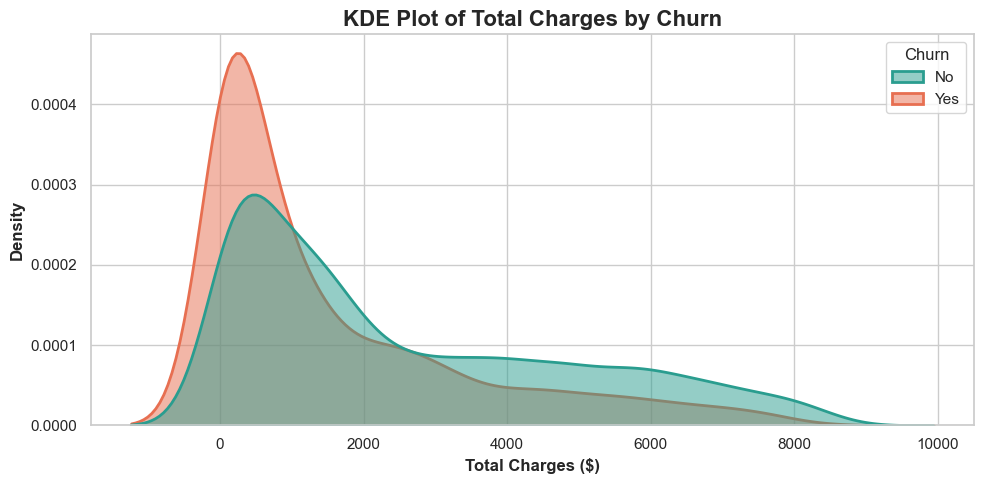

In [26]:
plt.figure(figsize=(10,5))
sns.kdeplot(
    data=df,
    x='TotalCharges',
    hue='Churn',
    fill=True,                 
    common_norm=False,          
    palette={'Yes': '#E76F51', 'No': '#2A9D8F'},
    alpha=0.5,                 
    linewidth=2
)

plt.title('KDE Plot of Total Charges by Churn', fontsize=16, fontweight='bold')
plt.xlabel('Total Charges ($)', fontsize=12, fontweight='bold')
plt.ylabel('Density', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()


## Insights: Total Charges by Churn

- Customers who **churned (Yes)** tend to have **lower total charges**, concentrated mostly below **$2,000**.  
- Customers who **did not churn (No)** show a **broader distribution**, with many having **higher total charges** extending beyond **$4,000**.  
- **Interpretation:** Low total charges imply **shorter customer tenure** — many churned customers likely left early in their contract.  

### Key Takeaway:
Churn is **higher among newer customers** with **low accumulated charges**.  
To reduce early churn:
- Strengthen **onboarding experiences** and **early customer engagement**.  
- Offer **introductory loyalty incentives** to encourage longer-term retention.


In [27]:
print('=====================Before Data Preprocessing====================')
df.head()

=====================Before Data Preprocessing====================


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# <b>5. Data Preprocessing</b>

In [28]:
def preprocess_data(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    
    # converting churn into binary values
    if 'Churn' in df.columns:
        df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})  
    
    # Detecting categorical columns only
    cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    
    # One Hot Encoding to the categorical columns
    df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
    
    return df
df_encoded = preprocess_data(df)
# df_encoded = df_encoded.astype(int)
df_encoded.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,False,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,34,56.95,1889.50,0,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,2,53.85,108.15,1,True,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,45,42.30,1840.75,0,True,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,2,70.70,151.65,1,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


## <b>Correlation Plot</b>

InternetService_Fiber optic             0.308020
PaymentMethod_Electronic check          0.301919
InternetService_No                     -0.227890
TechSupport_No internet service        -0.227890
OnlineSecurity_No internet service     -0.227890
DeviceProtection_No internet service   -0.227890
OnlineBackup_No internet service       -0.227890
StreamingMovies_No internet service    -0.227890
StreamingTV_No internet service        -0.227890
Contract_Two year                      -0.302253
tenure                                 -0.352229
Name: Churn, dtype: float64


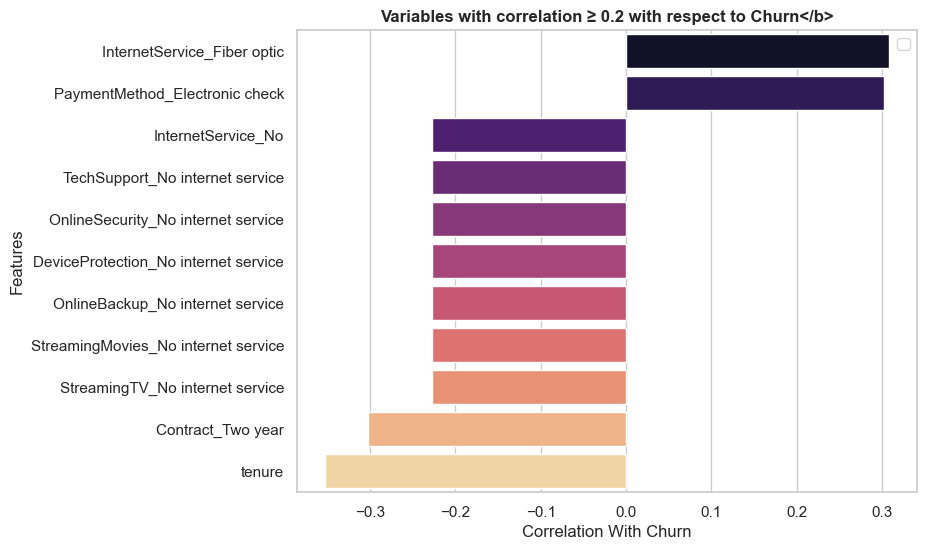

In [29]:
corr = df_encoded.corr()['Churn'].drop('Churn')

threshold = 0.2 # it means take the values where is greater than 02(moderate values)

imp_corr = corr[corr.abs() >= threshold]

imp_corr = imp_corr.sort_values(ascending = False)
print(imp_corr)

plt.figure(figsize = (8,6))
sns.barplot(
  x = imp_corr.values,
  y = imp_corr.index,
  palette = 'magma'
)
plt.title(f'Variables with correlation ≥ {threshold} with respect to Churn</b>',fontweight = 'bold')
plt.xlabel('Correlation With Churn')
plt.ylabel('Features')
plt.legend()
plt.show()


# <b>6. Separating the Data & applying the `train_test_split` to split the data into `X_train,X_test,y_train,y_test`</b>

In [30]:
# ------------separating the encoded data into X & y
X = df_encoded.drop(columns = "Churn")
y = df_encoded['Churn'].values

# --------applying the train_test_split---------
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, stratify = y) # stratify = y tensures the same class proportions are maintained in both subsets
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (5282, 30)
X_test shape: (1761, 30)
y_train shape: (5282,)
y_test shape: (1761,)


# <b>7. Let's check the distribution of the data</b>

## <b>>`X_train` & `X_test` distribution</b>

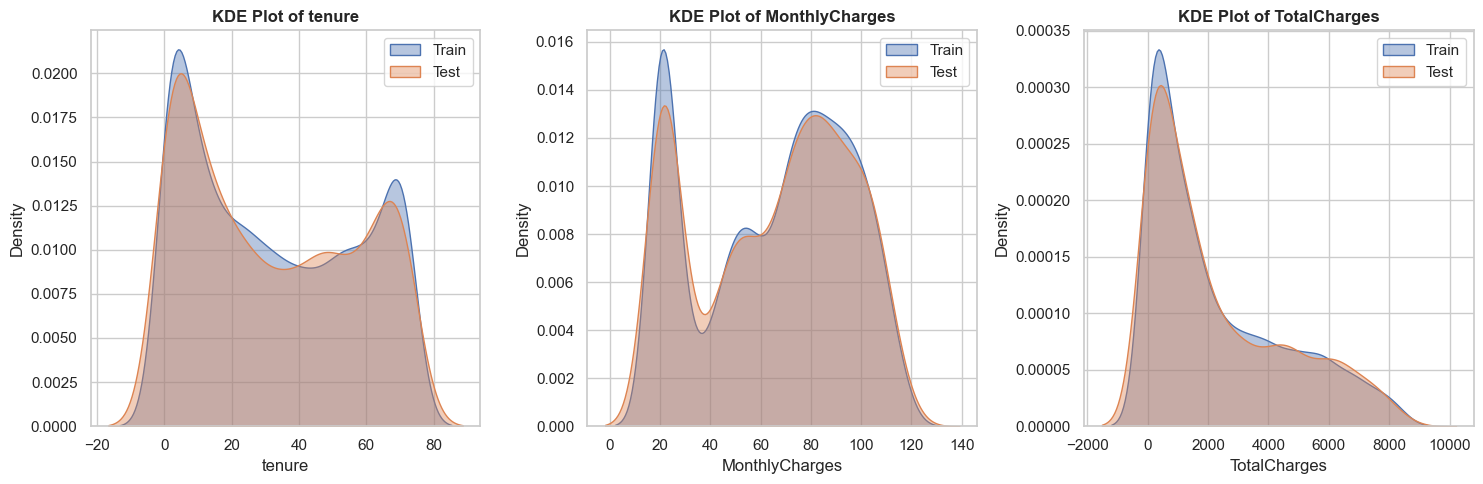

In [31]:
cols = X.columns[:3] 

fig, axes = plt.subplots(nrows=1, ncols=len(cols), figsize=(15, 5))

for i, col in enumerate(cols):
    sns.kdeplot(X_train[col], label='Train', ax=axes[i], fill=True, alpha=0.4)
    sns.kdeplot(X_test[col], label='Test', ax=axes[i], fill=True, alpha=0.4)
    
    axes[i].set_title(f'KDE Plot of {col}', fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')
    axes[i].legend()

plt.tight_layout()
plt.show()


## <b>>`y_train` & `y_test` class comparison</b>

In [32]:
train_churn_rate = y_train.mean()
test_churn_rate = y_test.mean()

print("=====Class Distribution (Churn Rate):=====\n")
print(f"Train :{train_churn_rate * 100:.4f} %")
print(f"Test : {test_churn_rate * 100:.4f} %")

=====Class Distribution (Churn Rate):=====

Train :26.5430 %
Test : 26.5190 %


# <b>8. Feature Scaling</b>

In [33]:
# ----------Applying Standard Scaler----------
scaler = StandardScaler()
print("Scaling the Data...")
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Finsihed Scaling the Data.")

Scaling the Data...
Finsihed Scaling the Data.


# <b>9.Training & Evaluating the Models</b>

In [124]:
#---------Function to print metrics and confusion matrix plot and store the results---------
results =  [] # to store the metric values
def evaluation(y_test,y_pred,model_name,save = False):

  acc = accuracy_score(y_test, y_pred)
  prec = precision_score(y_test, y_pred)
  rec = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  if save == True:
      # store the results
      results.append({
            "Model": model_name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall": rec,
            "F1-Score": f1
      })
  

  print(f"============={model_name}=============  \n"
                    f"Accuracy : {round(acc, 4)}  \n"
                    f"Precision : {round(prec, 4)}  \n"
                    f"Recall : {round(rec, 4)}  \n"
                    f"F1-Score : {round(f1, 4)}  \n"
                    f"Classification Report :  \n"
                    f"{classification_report(y_test, y_pred)}")
  
  # Confusion Matrix
  cm = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(5,4))
  sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", cbar=False,
              xticklabels=["No Churn", "Churn"],
              yticklabels=["No Churn", "Churn"])
  plt.xlabel("Prediction")
  plt.ylabel("Actual")
  plt.title(f"Confusion Matrix - {model_name}")
  plt.show()

## <b>9.1 Logistic Regression

=============Logistic Regression=============  
Accuracy : 0.8069  
Precision : 0.656  
Recall : 0.5717  
F1-Score : 0.611  
Classification Report :  
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1294
           1       0.66      0.57      0.61       467

    accuracy                           0.81      1761
   macro avg       0.75      0.73      0.74      1761
weighted avg       0.80      0.81      0.80      1761



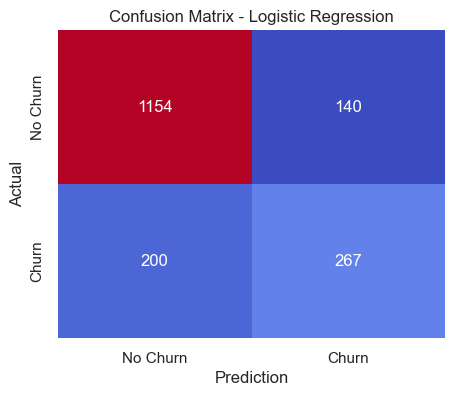

In [125]:
log = LogisticRegression()

log.fit(X_train_scaled,y_train)
y_pred = log.predict(X_test_scaled)
evaluation(y_test,y_pred,model_name="Logistic Regression",save = True)

## <b>9.2 K-Nearest Neighbors (KNN)

=============K-Nearest Neighbors (KNN)=============  
Accuracy : 0.7672  
Precision : 0.5646  
Recall : 0.5332  
F1-Score : 0.5485  
Classification Report :  
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1294
           1       0.56      0.53      0.55       467

    accuracy                           0.77      1761
   macro avg       0.70      0.69      0.70      1761
weighted avg       0.76      0.77      0.77      1761



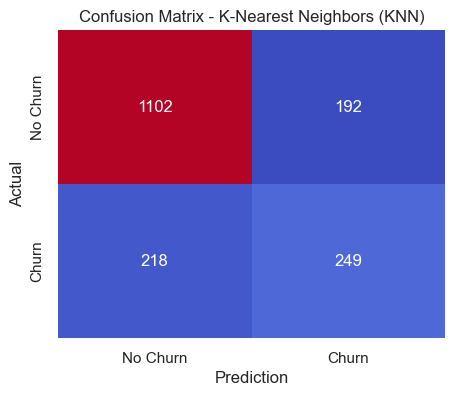

In [126]:
KNN = KNeighborsClassifier()

KNN.fit(X_train_scaled,y_train)
y_pred = KNN.predict(X_test_scaled)
evaluation(y_test,y_pred,model_name="K-Nearest Neighbors (KNN)",save = True)

## <b>9.3 Support Vector Classifier(SVC)

=============SVC=============  
Accuracy : 0.7978  
Precision : 0.6599  
Recall : 0.4904  
F1-Score : 0.5627  
Classification Report :  
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1294
           1       0.66      0.49      0.56       467

    accuracy                           0.80      1761
   macro avg       0.75      0.70      0.72      1761
weighted avg       0.79      0.80      0.79      1761



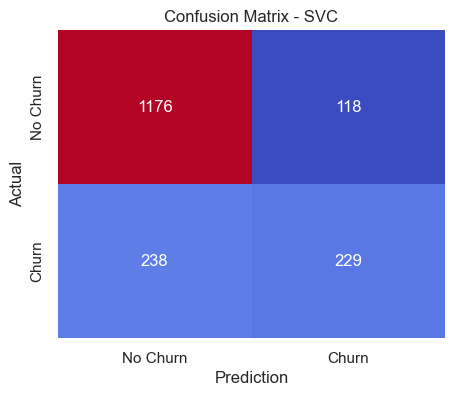

In [127]:
svc = SVC()

svc.fit(X_train_scaled,y_train)
y_pred = svc.predict(X_test_scaled)
evaluation(y_test,y_pred,model_name="SVC",save= True)

## <b>9.4 Decision Tree Classifier

=============Decision Tree Classifier=============  
Accuracy : 0.7314  
Precision : 0.4937  
Recall : 0.5011  
F1-Score : 0.4973  
Classification Report :  
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1294
           1       0.49      0.50      0.50       467

    accuracy                           0.73      1761
   macro avg       0.66      0.66      0.66      1761
weighted avg       0.73      0.73      0.73      1761



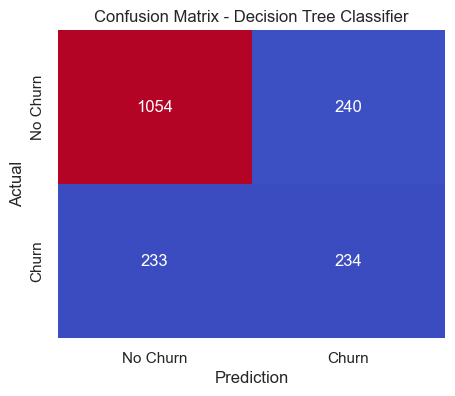

In [128]:
DT = DecisionTreeClassifier()

DT.fit(X_train_scaled,y_train)
y_pred = DT.predict(X_test_scaled)
evaluation(y_test,y_pred,model_name="Decision Tree Classifier",save= True)

## <b>9.5 Random Forest Classifier

=============Random Forest Classifier=============  
Accuracy : 0.8012  
Precision : 0.6603  
Recall : 0.5161  
F1-Score : 0.5793  
Classification Report :  
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1294
           1       0.66      0.52      0.58       467

    accuracy                           0.80      1761
   macro avg       0.75      0.71      0.72      1761
weighted avg       0.79      0.80      0.79      1761



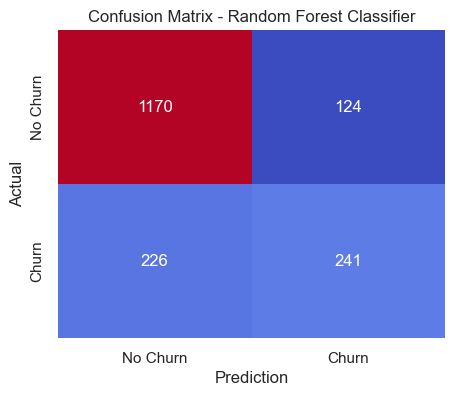

In [129]:
RFC = RandomForestClassifier()

RFC.fit(X_train_scaled,y_train)
y_pred = RFC.predict(X_test_scaled)
evaluation(y_test,y_pred,model_name="Random Forest Classifier",save= True)

## <b>9.6 AdaBoost Classifier

=============AdaBoost Classifier=============  
Accuracy : 0.8007  
Precision : 0.6667  
Recall : 0.4968  
F1-Score : 0.5693  
Classification Report :  
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1294
           1       0.67      0.50      0.57       467

    accuracy                           0.80      1761
   macro avg       0.75      0.70      0.72      1761
weighted avg       0.79      0.80      0.79      1761



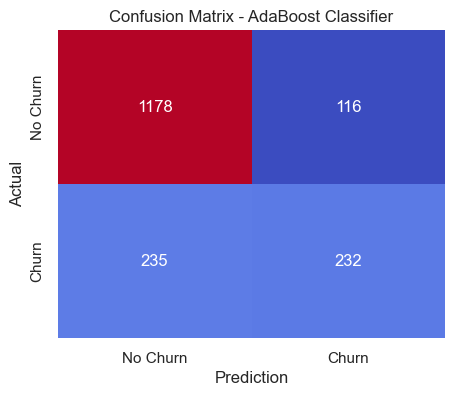

In [130]:
AC = AdaBoostClassifier()

AC.fit(X_train_scaled,y_train)
y_pred = AC.predict(X_test_scaled)
evaluation(y_test,y_pred,model_name="AdaBoost Classifier",save= True)

## <b>9.7 Gradient Boosting Classifier

=============Gradient Boosting Classifier=============  
Accuracy : 0.8171  
Precision : 0.6954  
Recall : 0.5525  
F1-Score : 0.6158  
Classification Report :  
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1294
           1       0.70      0.55      0.62       467

    accuracy                           0.82      1761
   macro avg       0.77      0.73      0.75      1761
weighted avg       0.81      0.82      0.81      1761



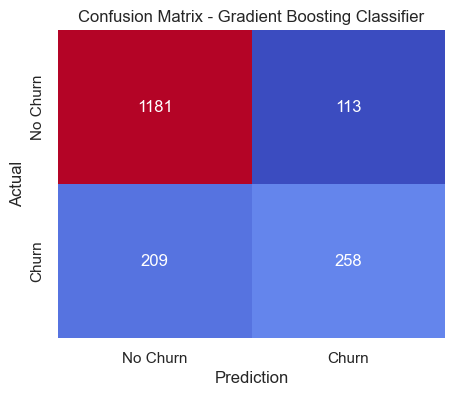

In [131]:
GBC = GradientBoostingClassifier()

GBC.fit(X_train_scaled,y_train)
y_pred = GBC.predict(X_test_scaled)
evaluation(y_test,y_pred,model_name="Gradient Boosting Classifier",save= True)

## <b>9.8 Voting Classifier

=============Voting Classifier=============  
Accuracy : 0.8166  
Precision : 0.7182  
Recall : 0.5075  
F1-Score : 0.5947  
Classification Report :  
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1294
           1       0.72      0.51      0.59       467

    accuracy                           0.82      1761
   macro avg       0.78      0.72      0.74      1761
weighted avg       0.81      0.82      0.81      1761



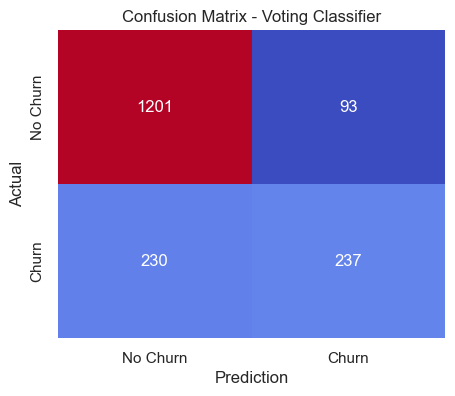

In [132]:
voting = VotingClassifier(estimators=[
    ('log', log),
    ('SVM', svc),
    ('DT', DT),
    ('RF', RFC),
    ('AC', AC),
    ('GBC', GBC)
], voting='hard')
voting.fit(X_train_scaled,y_train)
y_pred = voting.predict(X_test_scaled)
evaluation(y_test,y_pred,model_name="Voting Classifier",save= True)

## <b>9.9 XG Boost Classifier

=============XG Boost=============  
Accuracy : 0.7888  
Precision : 0.619  
Recall : 0.5289  
F1-Score : 0.5704  
Classification Report :  
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1294
           1       0.62      0.53      0.57       467

    accuracy                           0.79      1761
   macro avg       0.73      0.71      0.72      1761
weighted avg       0.78      0.79      0.78      1761



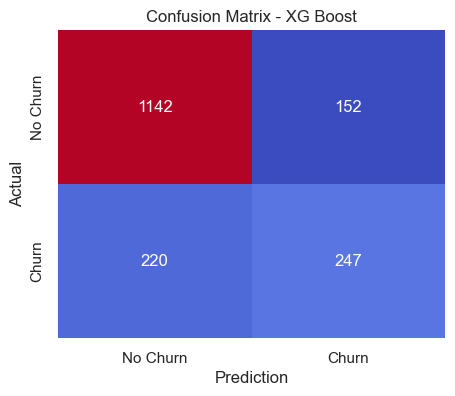

In [135]:
xgb = xgb.XGBClassifier()
xgb.fit(X_train_scaled,y_train)
y_pred = xgb.predict(X_test_scaled)
evaluation(y_test,y_pred,model_name = 'XG Boost',save= True)

In [136]:
df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by = "F1-Score",ascending=False).reset_index()

display(Markdown("========================Model Results===========================\n"
        f"{df_results.to_markdown(index = False)}"))


========================Model Results===========================
|   index | Model                        |   Accuracy |   Precision |   Recall |   F1-Score |
|--------:|:-----------------------------|-----------:|------------:|---------:|-----------:|
|       6 | Gradient Boosting Classifier |   0.817149 |    0.695418 | 0.552463 |   0.615752 |
|       0 | Logistic Regression          |   0.806928 |    0.65602  | 0.571734 |   0.610984 |
|       7 | Voting Classifier            |   0.816581 |    0.718182 | 0.507495 |   0.59473  |
|       4 | Random Forest Classifier     |   0.801249 |    0.660274 | 0.51606  |   0.579327 |
|       8 | XG Boost                     |   0.788756 |    0.619048 | 0.528908 |   0.570439 |
|       5 | AdaBoost Classifier          |   0.800681 |    0.666667 | 0.496788 |   0.569325 |
|       2 | SVC                          |   0.797842 |    0.659942 | 0.490364 |   0.562654 |
|       1 | K-Nearest Neighbors (KNN)    |   0.767178 |    0.564626 | 0.533191 |   0.548458 |
|       3 | Decision Tree Classifier     |   0.731403 |    0.493671 | 0.501071 |   0.497343 |

# <b>10. Hyperparameter Tuning & Finding the best Models</b>

In [45]:
#================= Optimized Parameter Grids ==================
param_grids = {
    "Logistic Regression": {
        "model": LogisticRegression(random_state=42, class_weight='balanced'),
        "params": {
            "C": [0.01, 0.1, 1, 10],
            "solver": ["liblinear", "saga"],
            "penalty": ["l1", "l2"],
            "max_iter": [300, 500]
        }
    },

    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 5, 7, 9],
            "weights": ["uniform", "distance"],
            "p": [1, 2]
        }
    },

    "SVC": {
        "model": SVC(random_state=42, class_weight='balanced'),
        "params": {
            "C": [0.1, 1, 5],
            "kernel": ["linear", "rbf"],
            "gamma": ["scale", "auto"]
        }
    },

    "Decision Tree": {
        "model": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
        "params": {
            "criterion": ["gini", "entropy"],
            "max_depth": [None, 5, 10, 20],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 5]
        }
    },

    "Random Forest": {
        "model": RandomForestClassifier(random_state=42, class_weight='balanced'),
        "params": {
            "n_estimators": [100, 300],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 5]
        }
    },

    "Gradient Boosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "params": {
            "n_estimators": [100, 300],
            "learning_rate": [0.01, 0.1, 0.2],
            "max_depth": [3, 5],
            "subsample": [0.8, 1.0]
        }
    },

    "AdaBoost": {
        "model": AdaBoostClassifier(random_state=42),
        "params": {
            "n_estimators": [100, 300],
            "learning_rate": [0.01, 0.1, 1.0]
        }
    }
}

In [53]:
best_models = {}
model_results = []
for model,para in param_grids.items():
  print(f"Running GridSearchCV for {model}\n")
  grid = GridSearchCV(
    estimator = para['model'],
    param_grid = para["params"],
    scoring = 'recall', # here scoring = 'recall' because we are focusing on the actual churned customers
    cv = 5,
    n_jobs = -1,
    verbose = 2
  )
  grid.fit(X_train_scaled,y_train)

  best_model = grid.best_estimator_
  best_models[model] = best_model

  print(f"=>Best Parameters for {model}: {grid.best_params_}")
  print(f"->Best Recall score : {grid.best_score_:.4f}\n")

  # Save each tuned model
  joblib.dump(best_model, f"best_{model.replace(' ', '_')}.pkl")
  print(f" Saved model as best_{model.replace(' ', '_')}.pkl")

  model_results.append({
    "Model":model,
    "Best Parameters":grid.best_params_,
    "Recall Score (CV) ":grid.best_score_
  })


Running GridSearchCV for Logistic Regression

Fitting 5 folds for each of 32 candidates, totalling 160 fits
=>Best Parameters for Logistic Regression: {'C': 0.01, 'max_iter': 300, 'penalty': 'l1', 'solver': 'liblinear'}
->Best Recall score : 0.8267

 Saved model as best_Logistic_Regression.pkl
Running GridSearchCV for KNN

Fitting 5 folds for each of 16 candidates, totalling 80 fits
=>Best Parameters for KNN: {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
->Best Recall score : 0.5385

 Saved model as best_KNN.pkl
Running GridSearchCV for SVC

Fitting 5 folds for each of 12 candidates, totalling 60 fits
=>Best Parameters for SVC: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
->Best Recall score : 0.8402

 Saved model as best_SVC.pkl
Running GridSearchCV for Decision Tree

Fitting 5 folds for each of 72 candidates, totalling 360 fits
=>Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
->Best Recall score : 0.78

In [59]:
model_results

[{'Model': 'Logistic Regression',
  'Best Parameters': {'C': 0.01,
   'max_iter': 300,
   'penalty': 'l1',
   'solver': 'liblinear'},
  'Recall Score (CV) ': np.float64(0.8266725978647687)},
 {'Model': 'KNN',
  'Best Parameters': {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'},
  'Recall Score (CV) ': np.float64(0.5385078800203356)},
 {'Model': 'SVC',
  'Best Parameters': {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'},
  'Recall Score (CV) ': np.float64(0.8402287747839349)},
 {'Model': 'Decision Tree',
  'Best Parameters': {'criterion': 'entropy',
   'max_depth': 5,
   'min_samples_leaf': 1,
   'min_samples_split': 2},
  'Recall Score (CV) ': np.float64(0.7888790035587188)},
 {'Model': 'Random Forest',
  'Best Parameters': {'max_depth': 10,
   'min_samples_leaf': 5,
   'min_samples_split': 2,
   'n_estimators': 100},
  'Recall Score (CV) ': np.float64(0.7546339603457042)},
 {'Model': 'Gradient Boosting',
  'Best Parameters': {'learning_rate': 0.1,
   'max_depth': 3,
   'n_estimators

In [65]:
results_df = pd.DataFrame(model_results)
results_df = results_df.sort_values(by = "Recall Score (CV) ",ascending=False).reset_index(drop=True)
display(Markdown("### <b>Model Tuned Results</b>\n"f"{results_df.to_markdown(index=False)}"))

### <b>Model Tuned Results</b>
| Model               | Best Parameters                                                                         |   Recall Score (CV)  |
|:--------------------|:----------------------------------------------------------------------------------------|---------------------:|
| SVC                 | {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}                                        |             0.840229 |
| Logistic Regression | {'C': 0.01, 'max_iter': 300, 'penalty': 'l1', 'solver': 'liblinear'}                    |             0.826673 |
| Decision Tree       | {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2} |             0.788879 |
| Random Forest       | {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}   |             0.754634 |
| KNN                 | {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}                                        |             0.538508 |
| Gradient Boosting   | {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}           |             0.515696 |
| AdaBoost            | {'learning_rate': 1.0, 'n_estimators': 300}                                             |             0.511441 |

## Here <b>SVC (Recall = 0.84)</b> & <b>Logistic Regression (Recall = 0.82)</b> gives the best results for High Recall
## <b><u>Why Choosing Only Recall Values?</u></b>
### <b>Recall (a.k.a. Sensitivity):</b>
### Out of all the customers who actually churned, how many did my model correctly predict as churn?
### → “Did I catch all the churners?”

### <b>Precision:</b>
### Out of all the customers my model predicted would churn, how many actually did churn?
### → “Were my churn predictions accurate?”

# <b>11. Comparing the Best Models</b>

=============Logistic Regression=============  
Accuracy : 0.7189  
Precision : 0.482  
Recall : 0.8009  
F1-Score : 0.6018  
Classification Report :  
              precision    recall  f1-score   support

           0       0.91      0.69      0.78      1294
           1       0.48      0.80      0.60       467

    accuracy                           0.72      1761
   macro avg       0.69      0.75      0.69      1761
weighted avg       0.79      0.72      0.73      1761



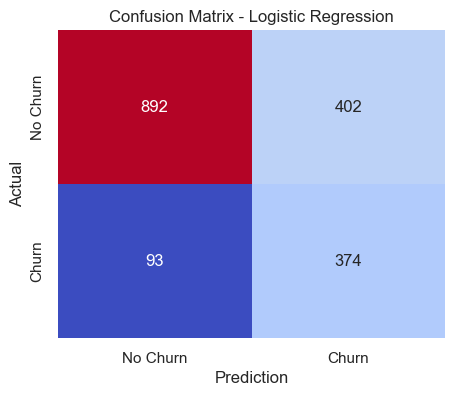

=============SVC=============  
Accuracy : 0.6917  
Precision : 0.4543  
Recall : 0.8094  
F1-Score : 0.582  
Classification Report :  
              precision    recall  f1-score   support

           0       0.90      0.65      0.76      1294
           1       0.45      0.81      0.58       467

    accuracy                           0.69      1761
   macro avg       0.68      0.73      0.67      1761
weighted avg       0.78      0.69      0.71      1761



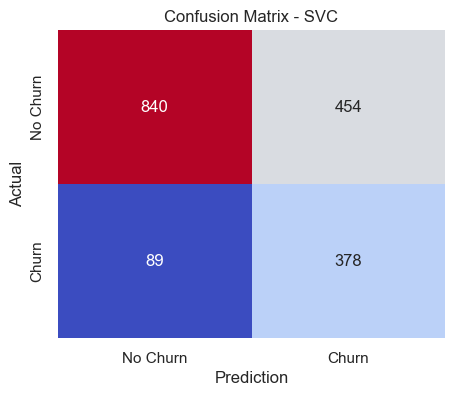

['final_svc.pkl']

In [137]:
best_params_logreg = {
    "C": 0.01,
    "max_iter": 300,
    "penalty": "l1",
    "solver": "liblinear"
}

best_params_svc = {
    "C": 0.1,
    "gamma": "scale",
    "kernel": "linear"
}

#----------Log Reg-------------
logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(
        random_state=42,
        class_weight='balanced',
        **best_params_logreg
    ))
])


logreg_pipeline.fit(X_train, y_train)
y_pred_logreg = logreg_pipeline.predict(X_test)
evaluation(y_test,y_pred_logreg,model_name = 'Logistic Regression')

joblib.dump(logreg_pipeline, "final_log_reg.pkl")


#---------------SVC---------------
svc_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC(
        random_state=42,
        class_weight='balanced',
        **best_params_svc
    ))
])

svc_pipeline.fit(X_train, y_train)
y_pred_svc = svc_pipeline.predict(X_test)
evaluation(y_test,y_pred_svc,model_name = 'SVC')


joblib.dump(svc_pipeline, "final_svc.pkl")

# <b>12. Final Model Summary</b>

**Chosen Model:** **<u>Logistic Regression</u>**  
**Reason for Choice:** **Balanced performance, interpretability, and operational simplicity.**

---

### ✅ **<u>Key Reasons for Selecting Logistic Regression</u>**

- **<u>High Recall (0.80)</u>**  
  - Nearly identical to SVC (0.81), effectively capturing most customers likely to churn — aligned with the primary business objective.

- **<u>Better Precision (0.48 vs 0.45)</u>**  
  - Fewer false positives than SVC, reducing unnecessary retention efforts.

- **<u>Higher F1-Score (0.60 vs 0.58)</u>**  
  - More balanced trade-off between recall and precision, indicating stronger overall classification performance.

- **<u>Simplicity & Interpretability</u>**  
  - Transparent coefficients reveal why customers churn; easier to communicate and act on compared to SVC.

- **<u>Computational Efficiency</u>**  
  - Faster to train and score; suitable for frequent retraining as data updates.

- **<u>Alignment with Business Priorities</u>**  
  - Supports insight generation (drivers of churn) in addition to prediction.

---

### 📈 **<u>Recommendations</u>**

- **<u>Feature Importance Analysis</u>**  
  - Inspect coefficients to identify top churn drivers (e.g., tenure, contract type, monthly charges) and design targeted retention actions.

- **<u>Model Monitoring</u>**  
  - Retrain periodically (e.g., monthly/quarterly) and track recall/precision drift on fresh data.

- **<u>Threshold Tuning</u>**  
  - Adjust the decision threshold using validation curves/PR curves to suit budgets (recall-heavy vs precision-heavy).

- **<u>Risk-Based Segmentation</u>**  
  - Use predicted probabilities to segment customers into **high**, **medium**, and **low** risk for prioritized outreach.
